<a href="https://colab.research.google.com/github/Rionarth/EE4802-Learning-From-Data/blob/main/EE4802_EE4213_Tut1Q1_skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EE4802/IE4213 - Part II - Tutorial 1, Question 1**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def exp_cost_gradient(X, w, y):
  # Compute prediction, cost and gradient based on mean square error loss
  pred_y = X @ w
  cost = np.sum((y - pred_y)*(y - pred_y))
  gradient = -2 * (y - pred_y) @ X
   # print(gradient)
   # print(cost)
  return pred_y, cost, gradient

In [10]:
# load data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('government-expenditure-on-education.csv')
expenditure = df['total_expenditure_on_education'].to_numpy()
years = df['year'].to_numpy()

Saving government-expenditure-on-education.csv to government-expenditure-on-education.csv


In [11]:
df.head()

,year,total_expenditure_on_education
0,1981,942517
1,1982,1358430
2,1983,1611647
3,1984,1769728
4,1985,1812376


In [12]:
# Create normalized variables and store in X and y
max_expenditure = max(expenditure)
max_year = max(years)
min_year = min(years)

y = expenditure/max_expenditure
X = np.ones([len(y), 2])
X[:, 1] = (years-min_year)/(max_year-min_year)




In [13]:
# Gradient decent
learning_rate = 0.01
w = np.array([0,0])
pred_y, cost, gradient = exp_cost_gradient(X,w,y)
num_iters = 100;
cost_vec = np.zeros(num_iters)
print('Initial cost = ', cost)
for i in range(0, num_iters):

  #update w
  w = w - learning_rate*gradient

  #compute updated cost and new gradient
  pred_y, cost, gradient = exp_cost_gradient(X,w,y)
  cost_vec[i] = cost

  if(i%20 == 0):
    print('Iter', i, ': cost =', cost)

pred_y, cost, gradient = exp_cost_gradient(X,w,y)
print('Final Cost =', cost)


Initial cost =  10.837516320395803
Iter 0 : cost = 1.9271350858321972
Iter 20 : cost = 0.3609795343234291
Iter 40 : cost = 0.18206899289551168
Iter 60 : cost = 0.1614836088879462
Iter 80 : cost = 0.15911506184003696
Final Cost = 0.15884658330945958


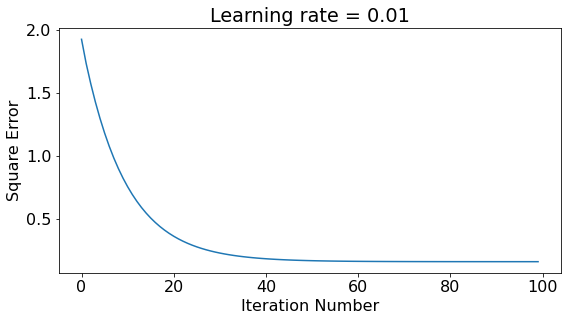

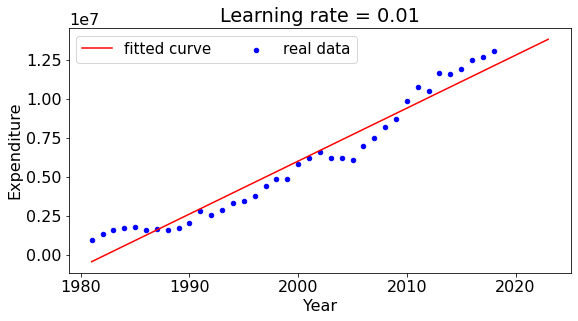

In [14]:
# Plot cost function values over iterations
plt.figure(0, figsize=[9,4.5])
plt.rcParams.update({'font.size': 16})
plt.plot(np.arange(0, num_iters, 1), cost_vec)
plt.xlabel('Iteration Number')
plt.ylabel('Square Error')
plt.xticks(np.arange(0, num_iters+1, 20))
plt.title('Learning rate = ' + str(learning_rate))
#plt.savefig('Figures/FigTut1Cost' + str(learning_rate) + '.eps')
# Extrapolate until year 2023
ext_years = np.arange(min_year,2024,1)
ext_X = np.ones([len(ext_years), 2])
ext_X[:, 1] = (ext_years-min_year)/(max_year-min_year)
pred_y = ext_X @ w # model-dependent
# Plot extrapolation
plt.figure(1, figsize=[9,4.5])
plt.rcParams.update({'font.size': 16})
plt.scatter(years, expenditure, s=20, marker='o', c='blue', label='real data')
plt.plot(ext_years, pred_y * max_expenditure, c='red', label='fitted curve')
plt.xlabel('Year')
plt.ylabel('Expenditure')
plt.title('Learning rate = ' + str(learning_rate))
plt.legend(loc='upper left',ncol=3, fontsize=15)